In [1]:
## Write a Script to get percentage of cells a gene is expressed in
## Test on Elite Tutorial Object :)
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

from ma_codes import mysize, mymap

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.4.5.2.dev23+g7e058a1a, on 2020-03-03 11:17.


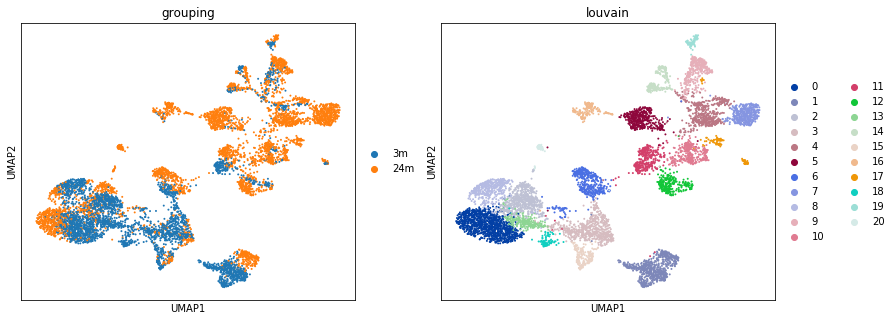

In [4]:
plt.rcParams["figure.figsize"] = (6, 5)
adata = sc.read("/media/agando/578222DA06535F39/Data_Objects/Scanpy_Objects/191014_Aging.h5ad")
sc.pl.umap(adata, color = ["grouping", "louvain"])

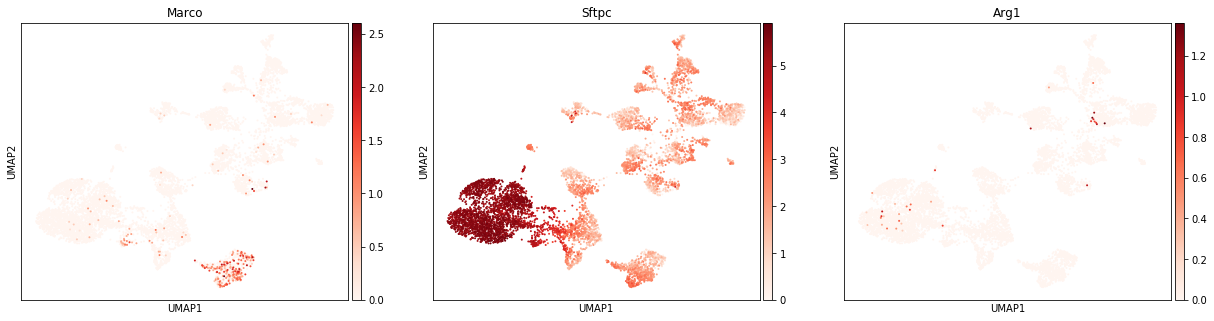

In [16]:
sc.pl.umap(adata, color = ["Marco", "Sftpc", "Arg1"], cmap = mymap)

In [6]:
ident = "0"
group_by = "louvain"
cells = adata.obs_names[adata.obs[group_by] == ident]

In [8]:
thresh_min = 0
data_temp = (adata.raw[cells].X > thresh_min).sum(0) / adata.raw[cells].X.shape[0]

In [11]:
data_temp[:10]

array([0.00179211, 0.03315412, 0.08064516, 0.04032258, 0.0797491 ,
       0.00537634, 0.0062724 , 0.02150538, 0.01612903, 0.00268817])

In [14]:
genes_use = adata.raw.var_names
data = pd.DataFrame(index = genes_use)
data["pct"] = data_temp
data.head()

,pct
index,
0610005C13Rik,0.001792
0610007N19Rik,0.033154
0610007P14Rik,0.080645
0610009B22Rik,0.040323
0610009D07Rik,0.079749


In [15]:
data.loc[["Marco", "Sftpc", "Arg1"]]

,pct
index,
Marco,0.006272
Sftpc,1.000000
Arg1,0.012545
